A.	Explain the main assumptions of Linear Regression in detail

B.	What is the difference between R-squared and Adjusted R-squared?

C. Adjusted R-squared modifies the R-squared value to account for the number of predictors in the model. It adjusts for the number of independent variables, providing a more accurate measure of how well the model generalizes to new data

D.	How logistic regression works for multiclass classification. Explain in detail.

E.	Explain the performance metrics of logistic regression.

F.	Use the Mobile price prediction dataset from below Kaggle link and create an end to end project on Jupyter/Colab.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

sns.set()
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\chauh\Downloads\Cellphone.csv")
df.head(5)

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,203,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4,2357
1,880,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749
2,40,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6,1916
3,99,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0,1315
4,880,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resoloution   161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
 13  Price         161 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [5]:
df.describe()

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739,2215.596273
std,410.851583,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564,768.187171
min,10.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000,614.000000
25%,237.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000,1734.000000
50%,774.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000,2258.000000
75%,1026.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000,2744.000000
max,1339.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000,4361.000000


In [6]:
df.duplicated().sum()

0

<Axes: >

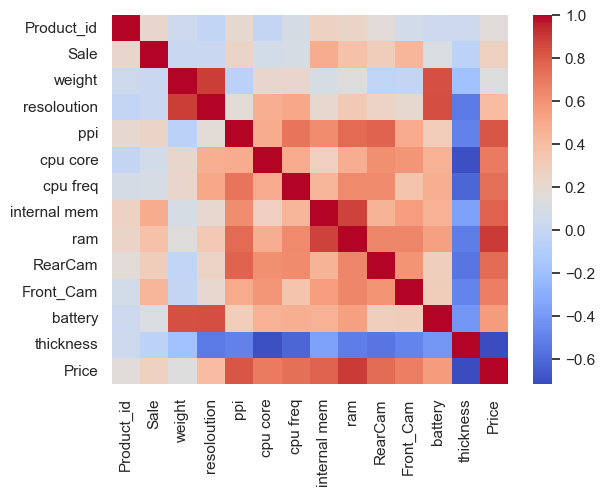

In [7]:
a=df.corr()
sns.heatmap(a,cmap='coolwarm')

In [8]:
df=df.drop(['Product_id','weight','thickness'],axis=1)
df.head(5)

,Sale,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,Price
0,10,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,2357
1,10,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,1749
2,10,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,1916
3,11,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,1315
4,11,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,1749


Sale            4.269384
resoloution     1.176110
ppi             0.602503
cpu core       -0.009077
cpu freq       -0.512663
internal mem    2.389683
ram             0.792698
RearCam         0.106929
Front_Cam       1.169750
battery         2.092660
Price           0.052347
dtype: float64


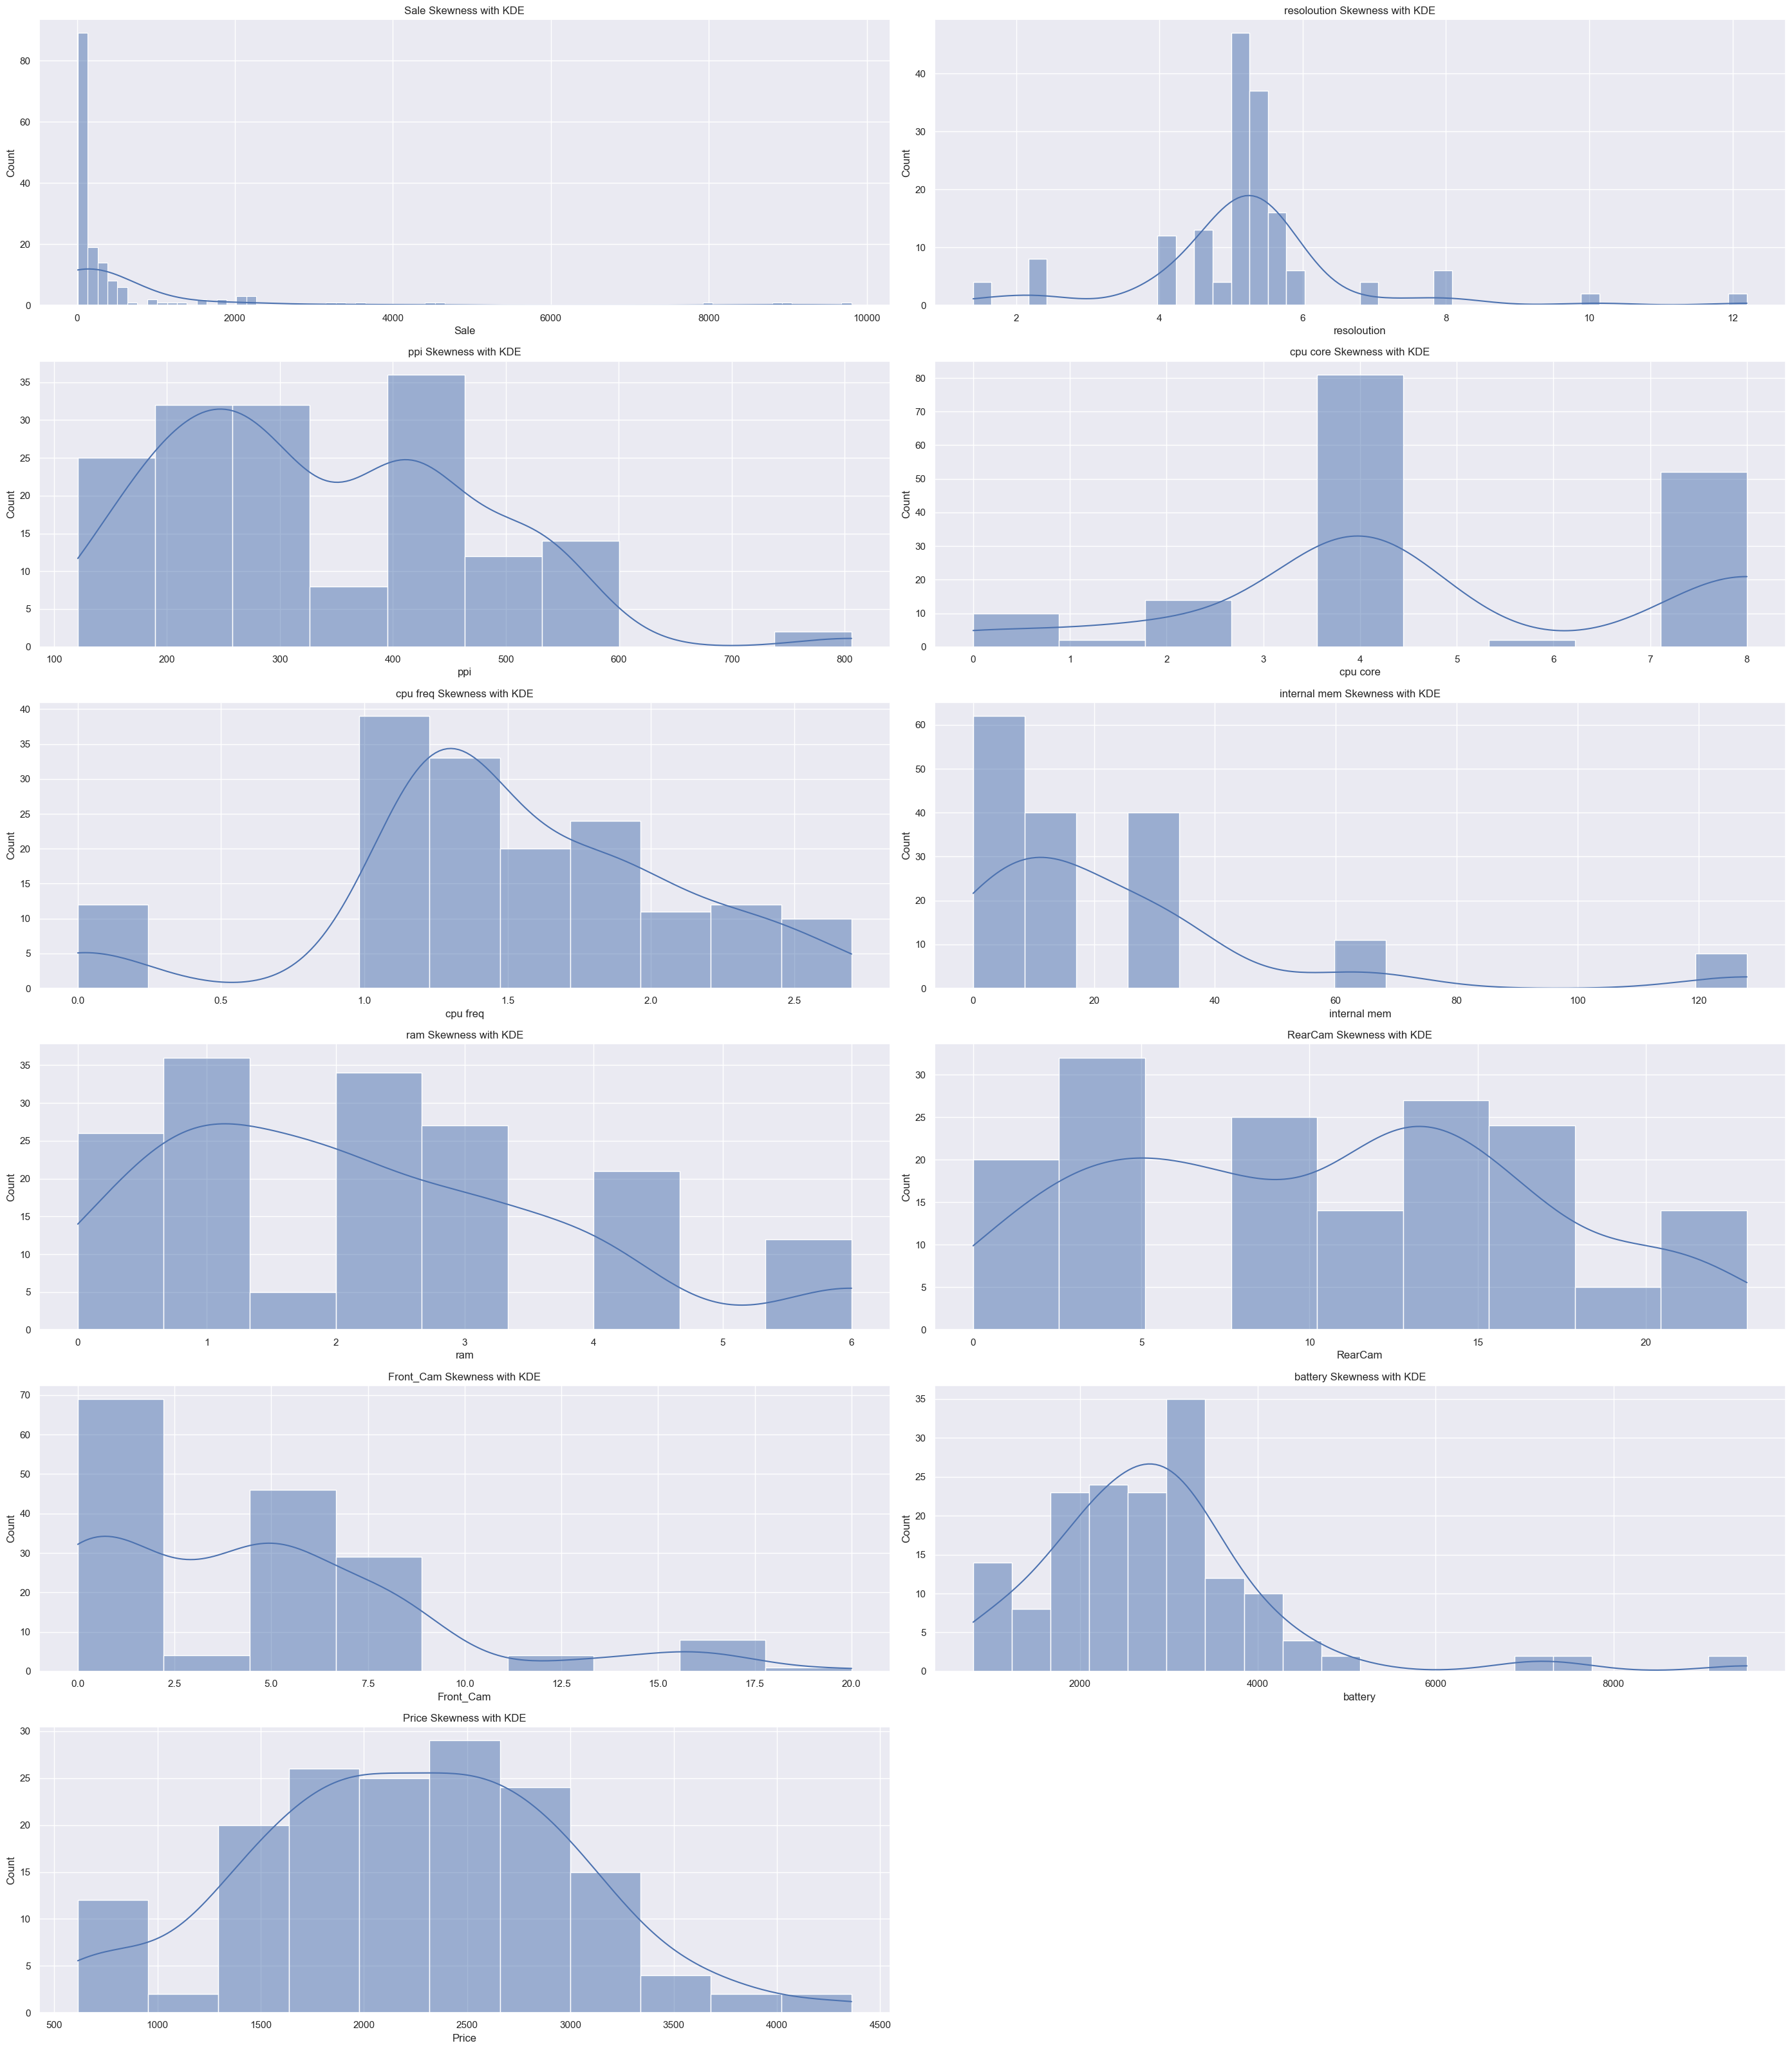

In [9]:
plt.figure(figsize=(28, 32))
print(df.skew())
for i, column in enumerate(df, 1):
    plt.subplot(6, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Skewness with KDE')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Sale            0.614823
resoloution    -1.068191
ppi            -0.255193
cpu core       -1.489122
cpu freq       -1.649505
internal mem   -0.621898
ram            -0.210086
RearCam        -1.229811
Front_Cam      -0.316747
battery        -0.361261
Price          -1.089103
dtype: float64


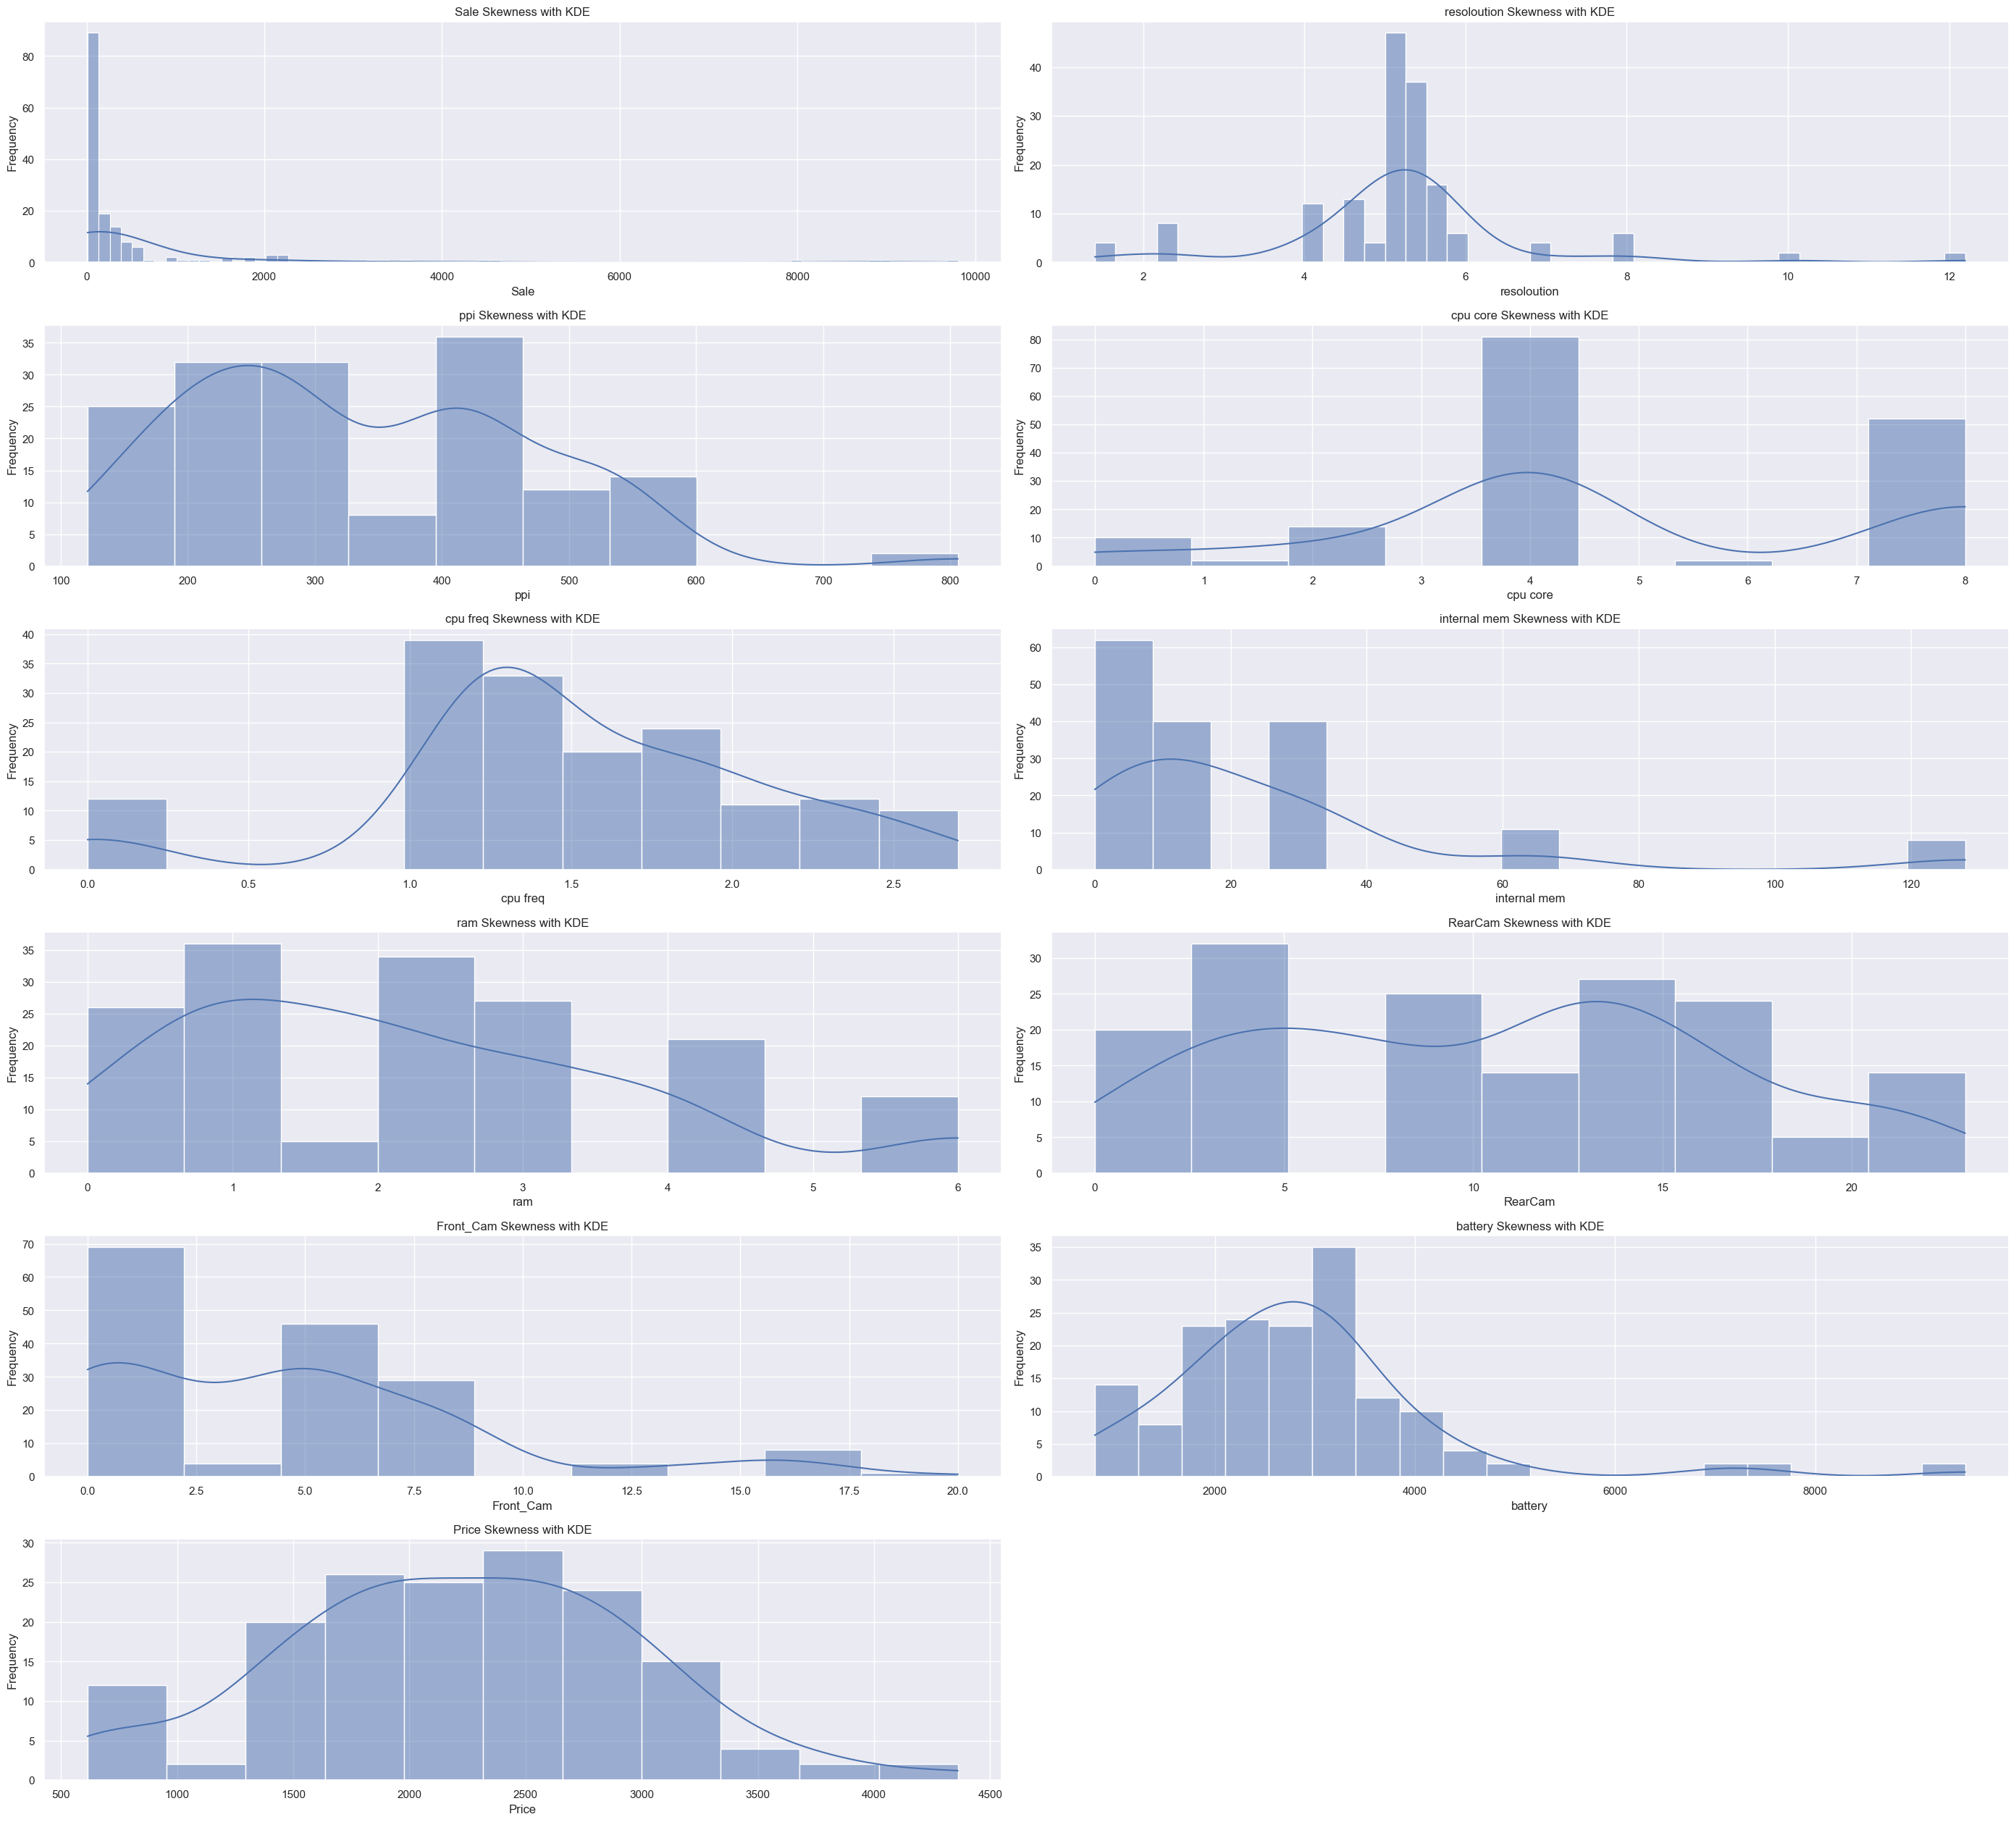

In [10]:
plt.figure(figsize=(28, 50))
df_log=np.log(df+1)
print(df_log.skew())
for i, column in enumerate(df_log, 1):
    plt.subplot(12, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Skewness with KDE')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

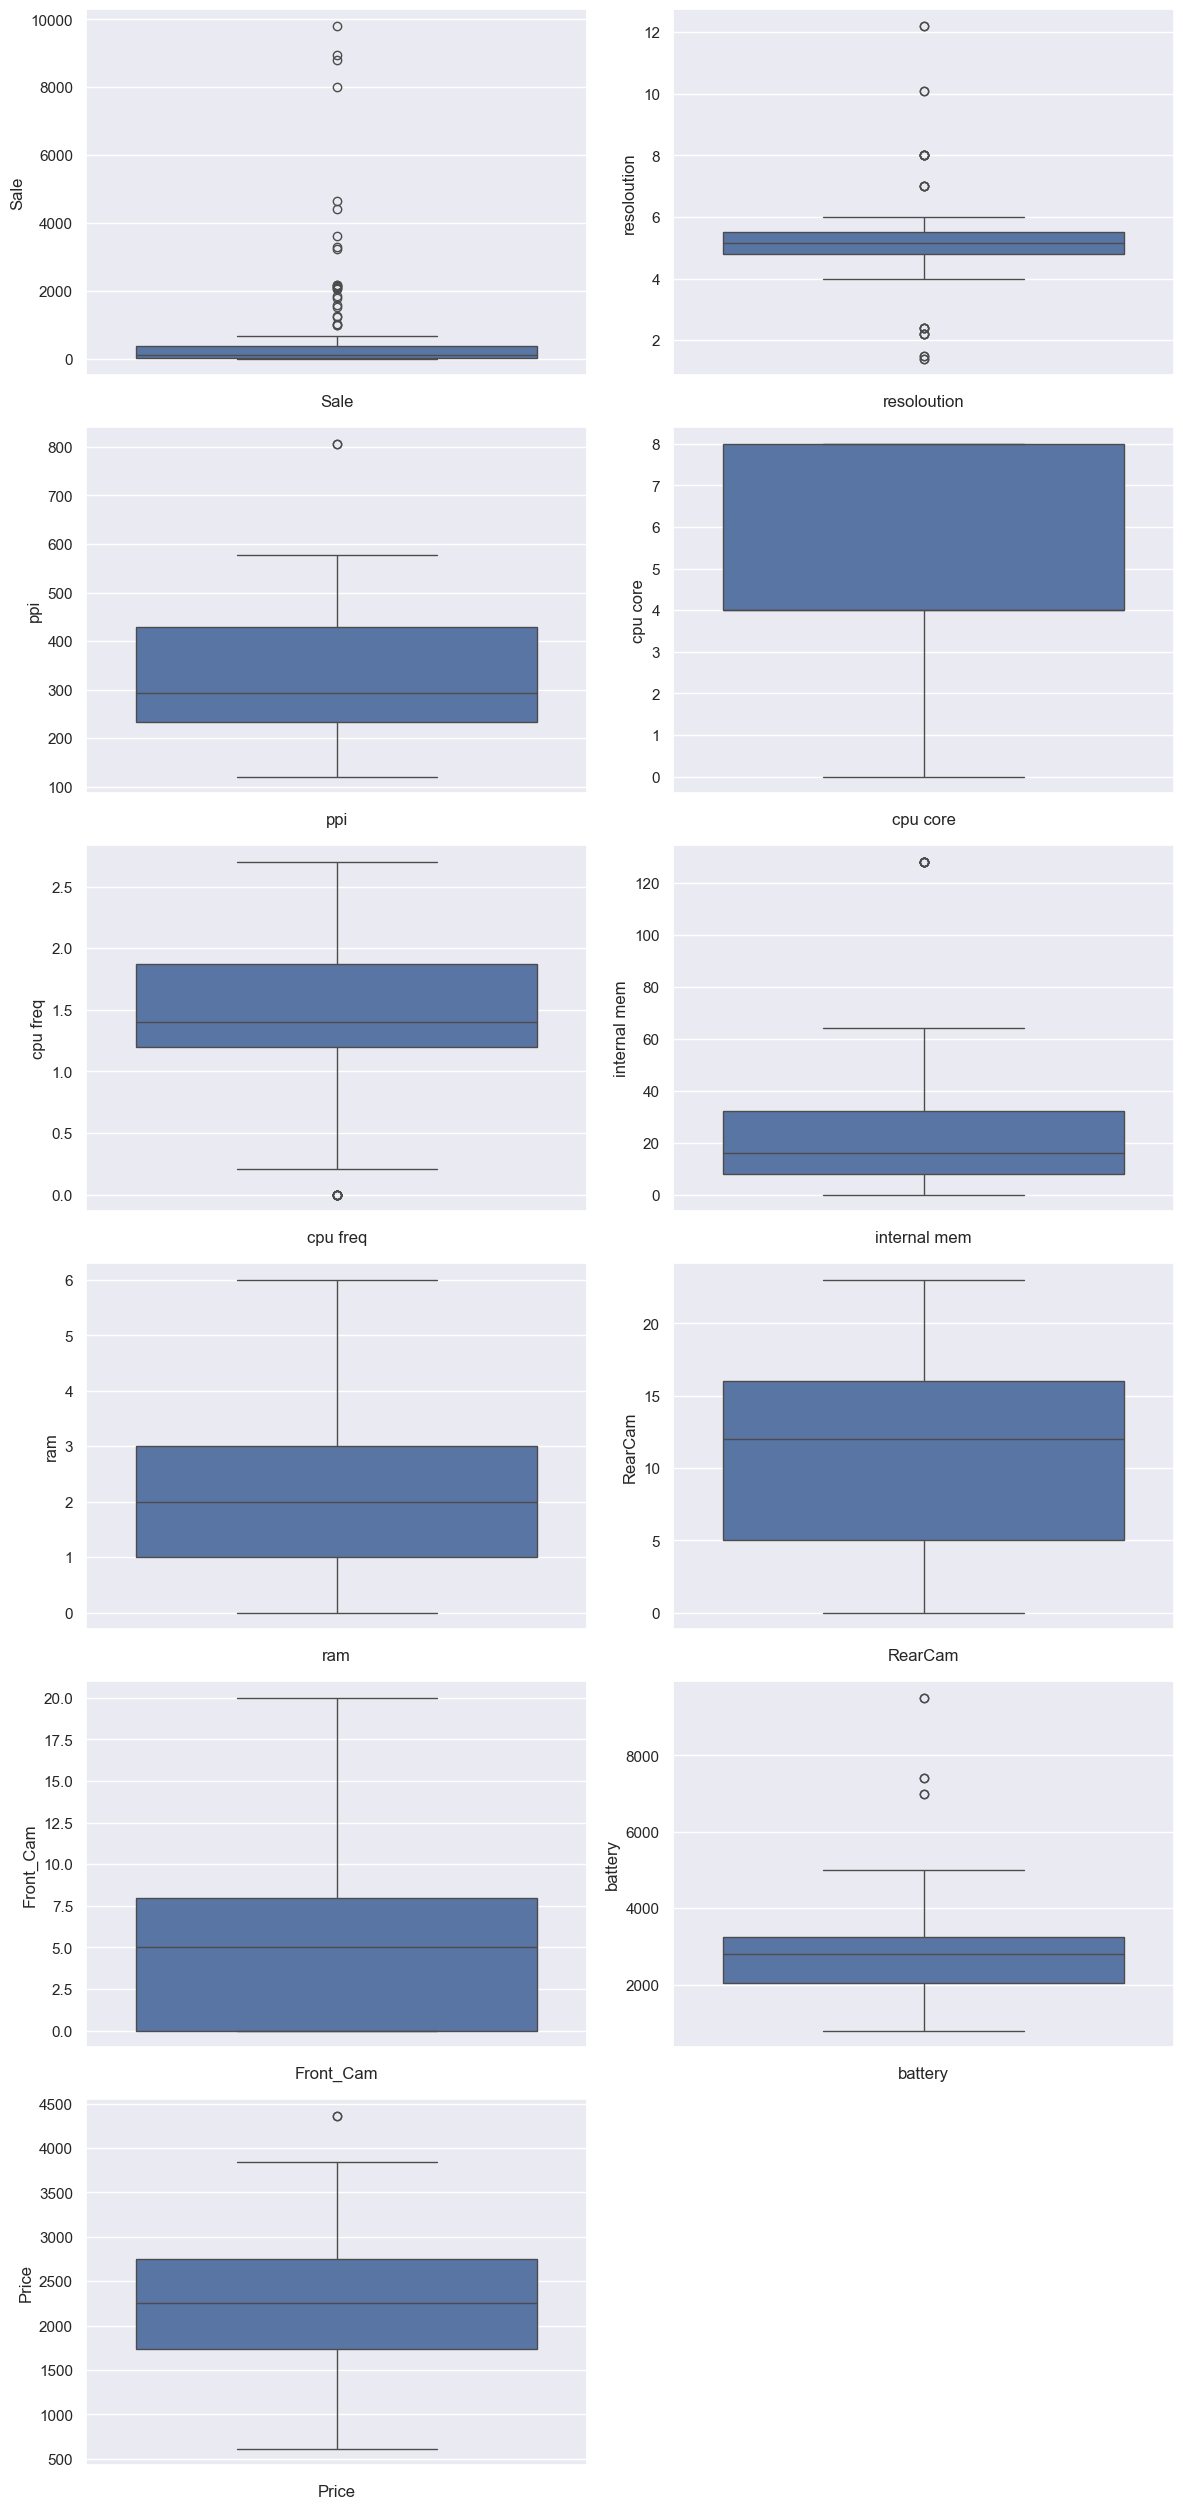

In [24]:
plt.figure(figsize=(12, 50))
df_log=np.log(df+1)
for i, column in enumerate(df_log, 1):
    plt.subplot(12, 2, i)
    sns.boxplot(df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [12]:
train_df,test_df=train_test_split(df_log,train_size=0.75,random_state=1)

In [13]:
train_df.shape

(120, 11)

In [14]:
test_df.shape

(41, 11)

In [15]:
train_x=train_df.drop(['Price'],axis=1)
train_y=train_df['Price']
test_x=test_df.drop(['Price'],axis=1)
test_y=test_df['Price']

In [16]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(120, 10) (120,) (41, 10) (41,)


In [17]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []
test_scores_r2 = []
test_scores_adj_r2 = []
test_scores_rmse = []

def evaluate_model_performance(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)  # Train the model
    train_ypred = model.predict(train_x)
    test_ypred = model.predict(test_x)
    
    train_r2 = r2_score(train_y, train_ypred) * 100
    test_r2 = r2_score(test_y, test_ypred) * 100
    
    n_train, p_train = train_x.shape
    n_test, p_test = test_x.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    train_rmse = np.sqrt(mean_squared_error(train_y, train_ypred))
    test_rmse = np.sqrt(mean_squared_error(test_y, test_ypred))

    # Append performance metrics to the lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    test_scores_r2.append(test_r2)
    test_scores_adj_r2.append(test_adj_r2)
    test_scores_rmse.append(test_rmse)

    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R2={train_r2:.2f}%, Adjusted R2={train_adj_r2:.2f}%, RMSE={train_rmse:.4f}")
    print(f"Test Data: R2={test_r2:.2f}%, Adjusted R2={test_adj_r2:.2f}%, RMSE={test_rmse:.4f}")

In [18]:
#Linear Regression Model
evaluate_model_performance(model=LinearRegression(),train_x=train_x,train_y=train_y,test_x=test_x,test_y=test_y)

LinearRegression Performance Metrics:
Training Data: R2=94.41%, Adjusted R2=93.89%, RMSE=0.0977
Test Data: R2=94.82%, Adjusted R2=93.09%, RMSE=0.0892


In [19]:
#Lasso Model
evaluate_model_performance(model=Lasso(),train_x=train_x,train_y=train_y,test_x=test_x,test_y=test_y)

Lasso Performance Metrics:
Training Data: R2=0.00%, Adjusted R2=-9.17%, RMSE=0.4132
Test Data: R2=-3.47%, Adjusted R2=-37.96%, RMSE=0.3988


In [20]:
#Ridge Model
evaluate_model_performance(model=Ridge(),train_x=train_x,train_y=train_y,test_x=test_x,test_y=test_y)

Ridge Performance Metrics:
Training Data: R2=94.35%, Adjusted R2=93.83%, RMSE=0.0982
Test Data: R2=94.69%, Adjusted R2=92.93%, RMSE=0.0903


In [21]:
#ElasticNet Model
evaluate_model_performance(model=ElasticNet(),train_x=train_x,train_y=train_y,test_x=test_x,test_y=test_y)

ElasticNet Performance Metrics:
Training Data: R2=0.00%, Adjusted R2=-9.17%, RMSE=0.4132
Test Data: R2=-3.47%, Adjusted R2=-37.96%, RMSE=0.3988


In [22]:
#DecisionTree Model
evaluate_model_performance(model=DecisionTreeRegressor(),train_x=train_x,train_y=train_y,test_x=test_x,test_y=test_y)

DecisionTreeRegressor Performance Metrics:
Training Data: R2=100.00%, Adjusted R2=100.00%, RMSE=0.0000
Test Data: R2=95.59%, Adjusted R2=94.12%, RMSE=0.0823


In [23]:
#RandomForest Model
evaluate_model_performance(model=RandomForestRegressor(),train_x=train_x,train_y=train_y,test_x=test_x,test_y=test_y)

RandomForestRegressor Performance Metrics:
Training Data: R2=99.52%, Adjusted R2=99.48%, RMSE=0.0286
Test Data: R2=98.04%, Adjusted R2=97.39%, RMSE=0.0549
